# Proxy Composites

In this tutorial, we introduce how to generate composites of proxies with `cfr`.

In [1]:
%load_ext autoreload
%autoreload 2

import cfr
import pandas as pd
import numpy as np

## Load the PAGES2k network stored in a pandas `DataFrame`

In [2]:
df = pd.read_pickle('./data/pages2k_dataset.pkl')
df.columns

Index(['paleoData_pages2kID', 'dataSetName', 'archiveType', 'geo_meanElev',
       'geo_meanLat', 'geo_meanLon', 'year', 'yearUnits',
       'paleoData_variableName', 'paleoData_units', 'paleoData_values',
       'paleoData_proxy'],
      dtype='object')

## Create a `ProxyDatabase` and load from the pandas `DataFrame`

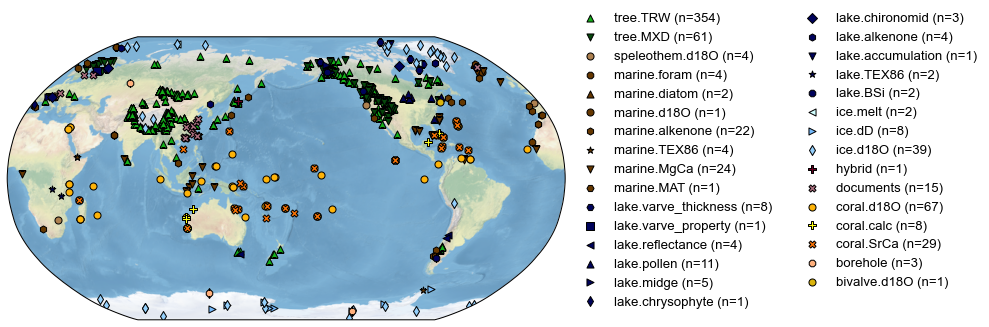

In [3]:
pdb = cfr.ProxyDatabase().from_df(df)
fig, ax = pdb.plot()

## Create composites for each proxy type

We take corals as an example.

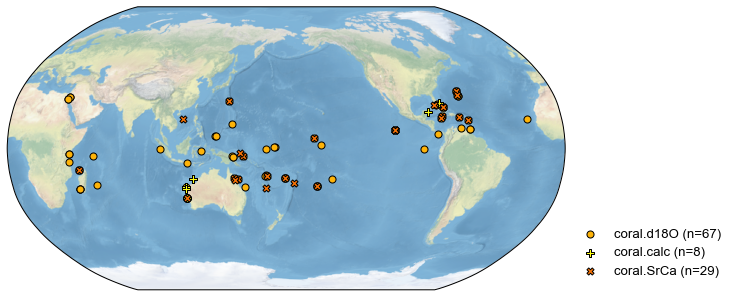

In [4]:
pdb_corals = pdb.filter(by='ptype', keys='coral')
fig, ax = pdb_corals.plot()

We load instrumental temperature observations as a target for scaling the proxy values.

In [5]:
# check the variable and dimension names
import xarray as xr

ds = xr.open_dataset('./data/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc')
ds

<xarray.Dataset>
Dimensions:           (time: 2052, latitude: 36, longitude: 72, bnds: 2)
Coordinates:
  * time              (time) datetime64[ns] 1850-01-16T12:00:00 ... 2020-12-1...
  * latitude          (latitude) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * longitude         (longitude) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
    realization       int64 ...
Dimensions without coordinates: bnds
Data variables:
    tas_mean          (time, latitude, longitude) float64 ...
    time_bnds         (time, bnds) datetime64[ns] ...
    latitude_bnds     (latitude, bnds) float64 ...
    longitude_bnds    (longitude, bnds) float64 ...
    realization_bnds  (bnds) int64 ...
Attributes:
    comment:      2m air temperature over land blended with sea water tempera...
    history:      
    institution:  Met Office Hadley Centre / Climatic Research Unit, Universi...
    licence:      HadCRUT5 is licensed under the Open Government Licence v3.0...
    reference:    C. P. Morice, J. J. Kennedy, N. A. Rayner, J. P. Winn, E. H...
    source:       CRUTEM.5.0.1.0 HadSST.4.0.0.0
    title:        HadCRUT.5.0.1.0 blended land air temperature and sea-surfac...
    version:      HadCRUT.5.0.1.0
    Conventions:  CF-1.7

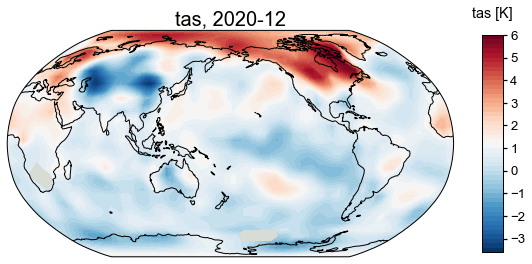

In [6]:
obs = cfr.ClimateField().load_nc(
    './data/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc',
    vn='tas_mean', lat_name='latitude', lon_name='longitude',
)
obs = obs.rename('tas')
fig, ax = obs.plot(it=-1)

In [7]:
pdb_corals.make_composite(obs)

Analyzing ProxyRecord:  13%|█▎        | 14/104 [00:00<00:01, 46.99it/s]/Users/fzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/fzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
Analyzing ProxyRecord:  20%|██        | 21/104 [00:00<00:01, 54.02it/s]/Users/fzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/fzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
Analyzing ProxyRecord:  34%|███▎      | 35/104 [00:00<00:01, 61.80it/s]/Users/fzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/lib/fu

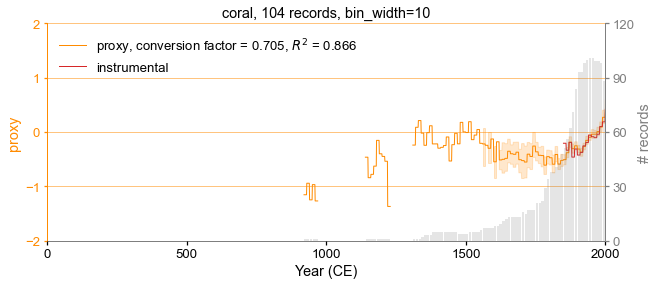

Figure saved at: "figs/coral_composites.pdf"


In [8]:
fig, ax = pdb_corals.plot_composite()
cfr.showfig(fig)
cfr.savefig(fig, './figs/coral_composites.pdf')

## The composite of ice core records

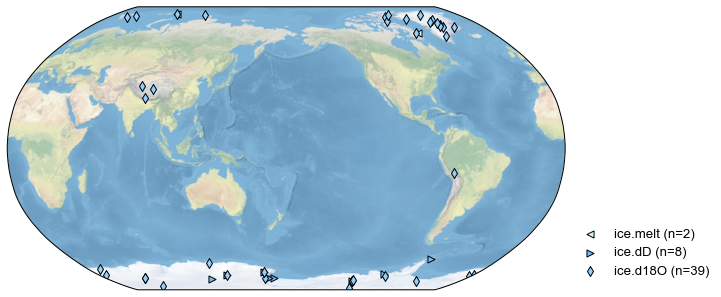

In [9]:
pdb_ice = pdb.filter(by='ptype', keys='ice')
fig, ax = pdb_ice.plot()

In [11]:
pdb_ice.make_composite(
    obs_nc_path='./data/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc',
    vn='tas_mean',
    lat_name='latitude', lon_name='longitude',
)

Analyzing ProxyRecord:  18%|█▊        | 9/49 [00:01<00:07,  5.09it/s]/Users/fzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/fzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
Analyzing ProxyRecord:  43%|████▎     | 21/49 [00:04<00:05,  5.07it/s]/Users/fzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/fzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
Analyzing ProxyRecord:  63%|██████▎   | 31/49 [00:06<00:03,  5.02it/s]/Users/fzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/lib/functi

In [12]:
# Check the composite infomation:

# pdb_ice.composite['proxy_comp'].index
# pdb_ice.composite['proxy_num']
# pdb_ice.composite['df_obs']
pdb_ice.composite['slope']
# pdb_ice.composite['intercept']

2.0593226894261307

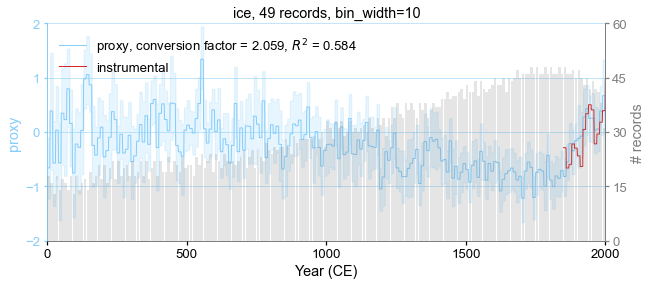

Figure saved at: "figs/composite.pdf"


In [13]:
fig, ax = pdb_ice.plot_composite()
cfr.showfig(fig)
cfr.savefig(fig, './figs/composite.pdf')